In [1]:
%matplotlib inline

Import optimize from scipy to optimise the value of theta for a given costFunction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [3]:
df = pd.read_csv('data/ex2data2.txt', names = ['X1', 'X2', 'Y'])

In [4]:
df

,X1,X2,Y
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


## Extracting the features

In [5]:
X = np.array(df[['X1','X2']])
Y = np.array(df['Y'])

In [6]:
X.shape

(118, 2)

In [7]:
Y.shape

(118,)

In [8]:
Y = Y.reshape((Y.shape[0], 1))

In [9]:
def initialise_theta(shape):
    theta = np.zeros(shape)
    return theta

In [ ]:
theta = initialise_theta((X.shape[1],1))

In [ ]:
theta.shape

<a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html'>np.where()</a> finds out the index elements in array based on a condition

np.where should be applied to rank 1 matrix otherwise it will a n-D array tuple. This implies that Reshaping of Y should be done after plotting/using np.where, otherwise just use indexing.

In [10]:
np.where(Y==0) # since I applied np.where to a 2-D array so it returned a two elements tuple

(array([ 58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

## Plotting training examples
Plotting as per the line equation

In [12]:
def plot_data(X):
    positive_indices = np.where(Y==1)
    negative_indices = np.where(Y==0)
    plt.figure(figsize =(5,5))
    # plot positive features
    a = plt.plot(X[positive_indices,0], X[positive_indices,1], 'k+', markersize=5)
    # plotting negative features
    b = plt.plot(X[negative_indices,0], X[negative_indices,1], 'yo', markersize=5)
    plt.legend((a[0], b[0]),('y=1','y=0' ))
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.show()

Using <a href ='https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py'>plt.legend()</a> for multiple plots to behave correctly

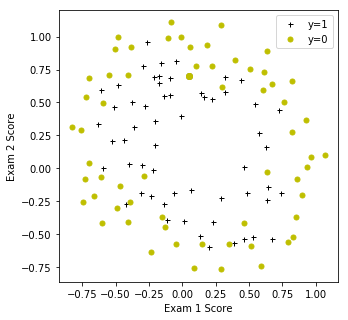

In [13]:
plot_data(X)

## Feature Mapping

Since the plot(X) shows that the examples are not linearly separable, therefore we create new features from existing features

One important point in creating new features is that, new feature should not be linear transformation of any old feature

This brings the redundancy in features and making X.T*X singular (non - invertible)

We are using <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html'>np.hstack</a> for adding new feature as a new column in mapped_feature matrix

The map feature function takes the original two features and returns back a 28 feature matrix, where x0 = 1 (for theta0):- <br>
and rest of the features are produced in this way:-
x1, x2, x1<sup>2</sup>, x2<sup>2</sup>, x1*x2, x1<sup>3</sup>, x2<sup>3</sup>, x1*x2<sup>2</sup>, etc.

In [14]:
def mapFeature(X1, X2):
    out = np.ones((X1.shape[0],1)) # initialised a single column matrix of all 1s and appending new features after it using hstack
#     out = np.hstack((out, np.ones((X1.shape[0],1))))   something wrong
#     print(out.shape)
    X1 = X1.reshape((X1.shape[0],1))
    X2 = X2.reshape((X2.shape[0],1))
#     print(np.multiply(np.power(X1, 1),np.power(X2, 0)).shape)
    degree = 6
#     out = np.hstack(out, )
    for i in range(1,degree+1):
        for j in range(i+1):
#             print("inside for loop", out.shape)
            out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))))
    return out
            

In [15]:
mapped_features = mapFeature(X[:,0], X[:,1])

In [16]:
mapped_features.shape  

(118, 28)

In [17]:
theta = initialise_theta((mapped_features.shape[1],1))

In [18]:
theta.shape

(28, 1)

In [19]:
def sigmoid(Z):
    sig = 1/(1+np.exp(-Z))
    return sig

In [20]:
def costFunctionReg(theta, X, Y, reg_parameter):
    m = Y.shape[0]
    Z = np.dot(X, theta)
    hx = sigmoid(Z)
    J = 0
    grad = np.zeros(theta.shape)
    J = -(1/m)*(np.sum(np.multiply(Y, np.log(hx)) + np.multiply(1-Y, np.log(1-hx)))) +  (reg_parameter/(2*m))*(np.sum(np.power(theta[1:],2)))
    grad[0] =  (1/m)*((np.dot(X[:,0].T, hx -Y)))
    grad[1:] = (1/m)*((np.dot(X[:,1:].T, hx -Y))) + (reg_parameter/m)*theta[1:]
    return (J, grad)

In [23]:
m = 118
Z = np.dot(mapped_features, test_theta)
hx = sigmoid(Z)
(1/m)*((np.dot(mapped_features[:,0].T, hx -Y)))

array([0.34604507])

In [22]:
test_theta = np.ones((28,1))

In [ ]:
mapped_features[:,1:].T

In [24]:
J, grad = costFunctionReg(theta, mapped_features, Y, 1)

In [25]:
J

0.6931471805599454

In [26]:
grad

array([[8.47457627e-03],
       [1.87880932e-02],
       [7.77711864e-05],
       [5.03446395e-02],
       [1.15013308e-02],
       [3.76648474e-02],
       [1.83559872e-02],
       [7.32393391e-03],
       [8.19244468e-03],
       [2.34764889e-02],
       [3.93486234e-02],
       [2.23923907e-03],
       [1.28600503e-02],
       [3.09593720e-03],
       [3.93028171e-02],
       [1.99707467e-02],
       [4.32983232e-03],
       [3.38643902e-03],
       [5.83822078e-03],
       [4.47629067e-03],
       [3.10079849e-02],
       [3.10312442e-02],
       [1.09740238e-03],
       [6.31570797e-03],
       [4.08503006e-04],
       [7.26504316e-03],
       [1.37646175e-03],
       [3.87936363e-02]])

In [27]:
def optimiseTheta(theta, X, Y, reg_parameter):
    temp = opt.fmin_tnc(func=costFunctionReg, x0= theta.flatten(), args = (X, Y.flatten(), reg_parameter))
    theta = temp[0]
    return theta
    

In [ ]:
theta = initialise_theta((mapped_features.shape[1],1))

In [ ]:
theta

**Initialize theta with zeros** before calling optimisation function

In [28]:
theta = optimiseTheta(theta, mapped_features, Y, 1)

The **theta returned from fmin_tnc is rank 1 matrix** , we need to reshape it otherwise the results were not right
in previous result the accuracy was = 47%

In [ ]:
x0= theta.flatten()

In [29]:
theta = theta.reshape((theta.shape[0],1))

## Prediction and Accuracy

In [30]:
def predict(theta, X):
    pred = np.round(sigmoid(np.dot(X, theta)))
    return pred

In [31]:
pred = predict(theta, mapped_features)

In [32]:
accuracy = np.mean(np.double(pred == Y)*100)

## Plot Decision Boundary

This feature function returns a matrix of features where each feature is rank 1 matrix

In [34]:
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out

In [54]:
def plotDecisionBoundary(X, Y, theta, reg_parameter):
    if (X.shape[1] <= 3):
        positive_indices = np.where(Y==1)
        negative_indices = np.where(Y==0)
        plt.figure(figsize =(5,5))
        # plot positive features
        a = plt.plot(X[positive_indices,0], X[positive_indices,1], 'k+', markersize=5)
        # plotting negative features
        b = plt.plot(X[negative_indices,0], X[negative_indices,1], 'yo', markersize=5)
        plt.legend((a[0], b[0]),('y=1','y=0' ))
        plt.xlabel('Exam 1 Score')
        plt.ylabel('Exam 2 Score')
        plt.show()
    else:
        plt.figure()
        positive_indices = np.where(Y==1)
        negative_indices = np.where(Y==0)
        plt.figure(figsize =(5,5))
        # plot positive features
        a = plt.plot(X[positive_indices,1], X[positive_indices,2], 'k+', markersize=5)
        # plotting negative features
        b = plt.plot(X[negative_indices,1], X[negative_indices,2], 'yo', markersize=5)
        u = np.linspace(-1, 1.5, 50).reshape((50,1))  # this reshaping was required for mapFeature function
        v = np.linspace(-1, 1.5, 50).reshape((50,1))
        plt.title('Decision Boundary with lamda = ' + str(reg_parameter) )
        
        z = np.zeros((len(u), len(v)))
#         print(z.shape)
        for i in range(len(u)):
            for j in range(len(v)):
                z[i][j] = np.dot(mapFeature(u[i], v[j]), theta)
        print(z[1].shape)
        u = u.reshape((50,))  # this reshaping was required for plotting contour otherwise error of shape doesn't match was coming
        v = v.reshape((50,))
        z = z.T
        plt.contour(u,v,z, 0)
        plt.legend((a[0], b[0]),('y=1','y=0', 'Decision Boundary' ))
#         plt.legend()
        plt.xlabel('Microchip Test 1')
        plt.ylabel('Microchip Test 2')
        plt.title('Decision Boundary with lamda = ' + str(reg_parameter) )
        plt.show()

(50,)


<Figure size 432x288 with 0 Axes>

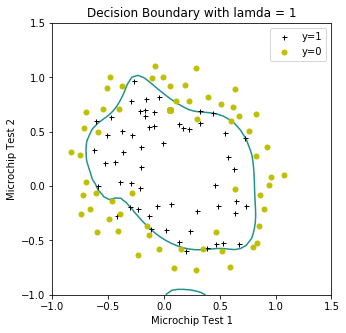

In [55]:
plotDecisionBoundary(mapped_features, Y, theta, 1)

## Changing Lamda

In [37]:
theta = initialise_theta((mapped_features.shape[1],1))

In [38]:
theta = optimiseTheta(theta, mapped_features, Y, 0)

(50, 50)
(50,)


<Figure size 432x288 with 0 Axes>

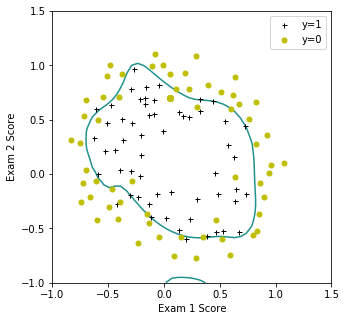

In [39]:
plotDecisionBoundary(mapped_features, Y, theta)

**The model has learnt all the training examples successfully => Overfitting**

In [59]:
theta = initialise_theta((mapped_features.shape[1],1))

In [60]:
theta = optimiseTheta(theta, mapped_features, Y, 100)

(50,)


<Figure size 432x288 with 0 Axes>

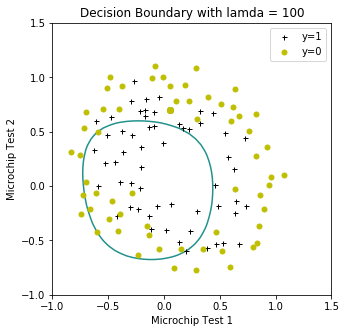

In [61]:
plotDecisionBoundary(mapped_features, Y, theta, 100)

**The model has performed poor on training examples => Underfitting**

In [ ]:
np.ones(1).shape

In [ ]:
temp = np.ones((X[:,0].shape[0]))

In [ ]:
temp = temp.reshape((temp.shape[0],1))

In [ ]:
temp = np.insert(temp,6, values = X[:,1], axis =1)

In [ ]:
temp = np.hstack((temp, np.array(X[:,0]).reshape((X[:,0].shape[0],1))))

In [ ]:
temp

In [ ]:
temp

In [ ]:
np.array(X[:,0])